# Importing libraries

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
from pycaret.regression import *
from warnings import filterwarnings
filterwarnings("ignore")

# Loading datatype

Loading both the datasets the train set as df and the test set as xtest

In [218]:
df = pd.read_csv("train_F3fUq2S.csv")
xtest = pd.read_csv("test_Bk2wfZ3.csv")
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [219]:
xtest.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


# Checking shape and datatypes

In [220]:
df.shape

(1888, 22)

The train dataset has 1888 rows and 22 columns

In [221]:
df.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

The dataset has many features wrongly labelled as number which are categorical. These datatypes are changed at the below steps.

# Five point summary

In [222]:
df.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,162.000000,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [223]:
df.var()

campaign_id           2.972027e+05
sender                1.074480e+01
subject_len           9.086129e+02
body_len              5.369395e+07
mean_paragraph_len    7.918314e+02
day_of_week           3.108849e+00
is_weekend            1.598939e-01
category              2.809763e+01
product               1.530052e+02
no_of_CTA             2.142160e+01
mean_CTA_len          1.403908e+02
is_image              7.507646e-01
is_personalised       5.349015e-02
is_quote              1.068951e+00
is_timer              0.000000e+00
is_emoticons          3.763114e-01
is_discount           3.816675e-02
is_price              3.068689e+05
is_urgency            9.973233e-02
target_audience       8.697312e+00
click_rate            7.093476e-03
dtype: float64

It looks like the variable is timer has 0 variance, hence it can be dropped

In [224]:
xtest.var()

campaign_id           4.845050e+04
sender                9.808968e+00
subject_len           9.355275e+02
body_len              5.153885e+07
mean_paragraph_len    7.230472e+02
day_of_week           3.210177e+00
is_weekend            1.661028e-01
category              2.824475e+01
product               1.389312e+02
no_of_CTA             1.529771e+01
mean_CTA_len          1.199576e+02
is_image              7.693289e-01
is_personalised       4.148603e-02
is_quote              1.057920e+00
is_timer              0.000000e+00
is_emoticons          9.482688e-01
is_discount           3.054415e-02
is_price              9.941147e+04
is_urgency            1.012706e-01
target_audience       9.208598e+00
dtype: float64

is timer is having a variance of 0 hence dropping it.  I have dropped below after few codes with other columns

# Checking the target variable

<AxesSubplot:xlabel='click_rate', ylabel='Density'>

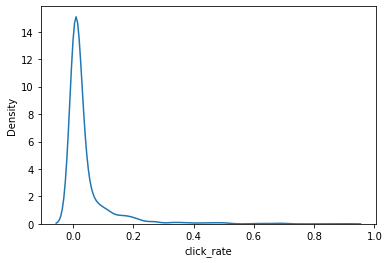

In [225]:
sns.kdeplot(df["click_rate"])

we can see that the target variable is right skewed , which means might use transformation to reduce skewness in it

# Taking inferences from visual analysis

<AxesSubplot:xlabel='target_audience'>

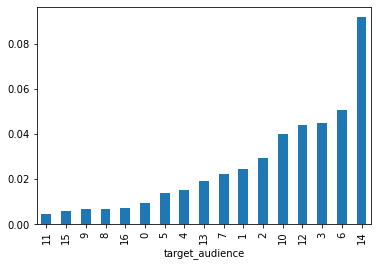

In [226]:
df.groupby(["target_audience"])["click_rate"].mean().sort_values().plot(kind = "bar")

Here we can see that the target audiance has clearly an ordinal categories. which means . here we can use ordinal encoding. However same classes might to be present in test dataset. Hence we are also checking along with it and making the enoding.

In [227]:
xtest["target_audience"].value_counts()

12    455
14     70
10     62
16     59
1      27
15     27
7      21
11      9
6       8
13      6
5       5
2       5
3       3
8       2
4       2
0       1
Name: target_audience, dtype: int64

As we see 15,9,8,16 have almost same average clicks we are grouping them as a single value in encoding.

In [228]:
 df["target_audience"].replace({11:0,15:1,9:1,8:1,16:1,0:2,5:3,4:3,13:4,7:5,1:6,2:7,10:8,12:9,3:9,6:10,14:20},inplace = True)
xtest["target_audience"].replace({11:0,15:1,9:1,8:1,16:1,0:2,5:3,4:3,13:4,7:5,1:6,2:7,10:8,12:9,3:9,6:10,14:20},inplace = True)

<AxesSubplot:xlabel='sender'>

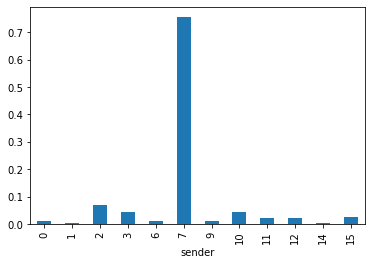

In [229]:
df.groupby(["sender"])["click_rate"].mean().plot(kind = "bar")

I have used my best score predictions to see for 8,4,5,13 which are not present in the train dataset. However it didnt improve the score

In [230]:
df["sender"].replace({0:0,1:0,6:0,9:0,14:0,11:1,12:1,15:1,3:2,10:2,4:3,5:3,13:4,8:5,7:15},inplace = True)
xtest["sender"].replace({0:0,1:0,6:0,9:0,14:0,11:1,12:1,15:1,3:2,10:2,4:3,5:3,13:4,8:5,7:15},inplace = True)

In [231]:
df["sender"].unique()

array([ 2,  0,  1, 15], dtype=int64)

<AxesSubplot:xlabel='product'>

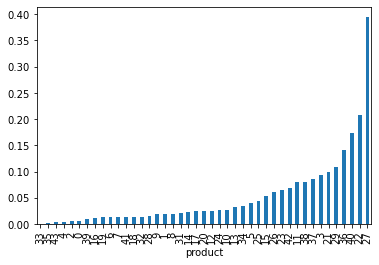

In [232]:
df.groupby(["product"])["click_rate"].mean().sort_values().plot(kind = "bar")

In [233]:
df.groupby(["product"])["click_rate"].mean().sort_values()

product
33    0.000362
35    0.002346
43    0.003699
4     0.004088
2     0.005209
0     0.006441
39    0.010109
16    0.011947
19    0.012512
6     0.013175
7     0.013309
41    0.013784
18    0.013859
32    0.014272
28    0.016265
9     0.018442
1     0.019037
8     0.019628
31    0.020405
14    0.022815
17    0.024078
20    0.024161
12    0.024210
24    0.025968
10    0.026795
13    0.033266
34    0.033923
5     0.039403
25    0.044878
15    0.054237
26    0.060373
23    0.064700
42    0.068959
11    0.079360
38    0.080995
37    0.084986
3     0.093073
21    0.098877
29    0.108795
36    0.141339
40    0.173647
22    0.207332
27    0.394864
Name: click_rate, dtype: float64

<AxesSubplot:xlabel='click_rate', ylabel='subject_len'>

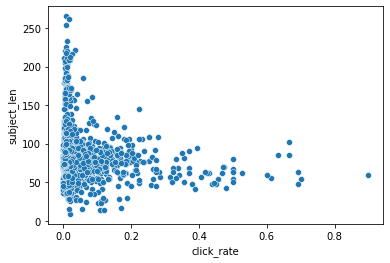

In [234]:
sns.scatterplot(df["click_rate"],df["subject_len"])

we can see here the click rate is heavily concentrated at the range of 40 to 110, which means that when the subject length is around 40 to 100 people tend to click through often 

<AxesSubplot:xlabel='click_rate', ylabel='body_len'>

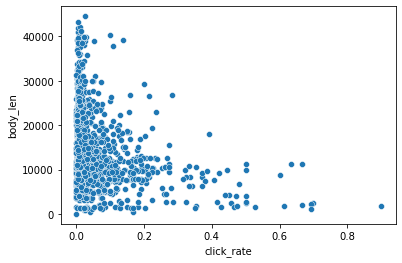

In [235]:
sns.scatterplot(df["click_rate"],df["body_len"])

we can see here the click rate is heavily concentrated at the range of 100 to 15000, which means that when the body length is around 100 to 15000 people tend to click through often

<AxesSubplot:xlabel='day_of_week'>

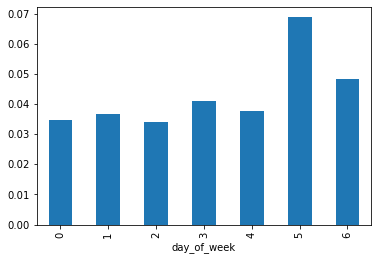

In [236]:
df.groupby(["day_of_week"])["click_rate"].mean().plot(kind = "bar")

we can see here that the average click rate is high during saturday and sunday.

<AxesSubplot:xlabel='category'>

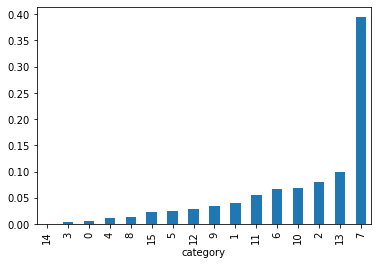

In [237]:
df.groupby(["category"])["click_rate"].mean().sort_values().plot(kind = "bar")

 we can clearly see that the category plays a huge role is click through rate. We can see that the average click through rate for category 7 is very high than others, while 14 seems to not existing at all.

<AxesSubplot:xlabel='click_rate', ylabel='no_of_CTA'>

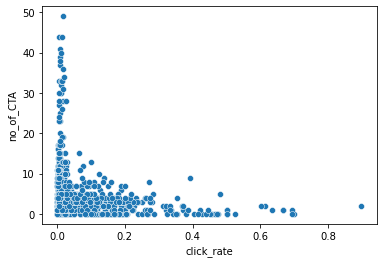

In [238]:
sns.scatterplot(df["click_rate"],df["no_of_CTA"])

we can clearly see that the click rate is concentrated at 0 to 8 . which means beyond that limit less customers tend to click

<AxesSubplot:xlabel='is_image'>

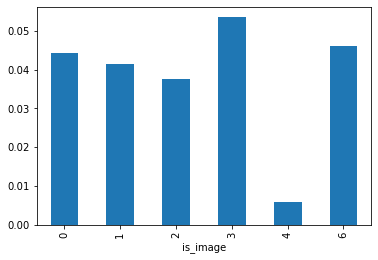

In [239]:
df.groupby(["is_image"])["click_rate"].mean().plot(kind = "bar")

we cant find any pattern in no of images impacting the click rate

<AxesSubplot:xlabel='times_of_day'>

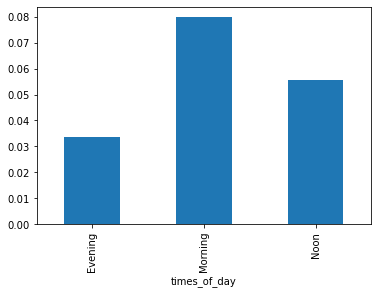

In [240]:
df.groupby(["times_of_day"])["click_rate"].mean().plot(kind = "bar")

we can see that the time of day is making a different, where the emails sent during morning is more and followed by noon and then evening

<AxesSubplot:xlabel='is_personalised'>

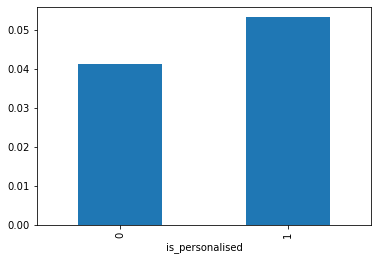

In [241]:
df.groupby(["is_personalised"])["click_rate"].mean().plot(kind = "bar")

we can see that the personalised email has more click rate than the non personised one

<AxesSubplot:xlabel='is_discount'>

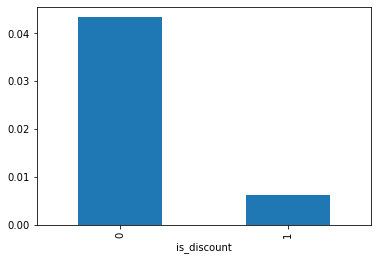

In [242]:
df.groupby(["is_discount"])["click_rate"].mean().plot(kind = "bar")

We can see that the variable without any discount seem to be having more average click rate than the ones without clicks.

<AxesSubplot:xlabel='is_urgency'>

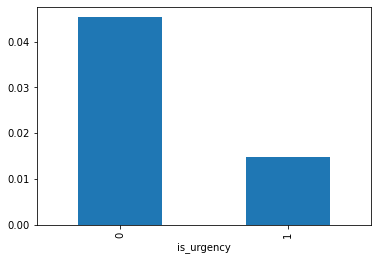

In [243]:
df.groupby(["is_urgency"])["click_rate"].mean().plot(kind = "bar")

we can see that the mails without isurgency seems to be performing well than without ones

<AxesSubplot:xlabel='is_emoticons'>

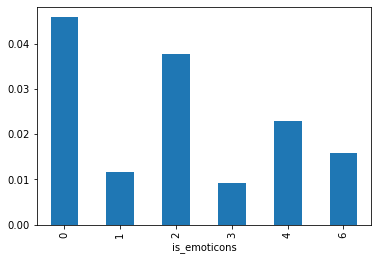

In [244]:
df.groupby(["is_emoticons"])["click_rate"].mean().plot(kind = "bar")

we can see that the mails without any emoticons seems to be having more but we cant find any certain pattern

In [245]:
xtest["is_emoticons"].value_counts()

0     644
1      72
2      21
3      15
4       6
6       3
17      1
Name: is_emoticons, dtype: int64

<AxesSubplot:xlabel='is_quote'>

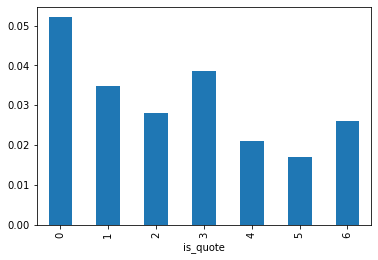

In [246]:
df.groupby(["is_quote"])["click_rate"].mean().plot(kind = "bar")

columns campaign id,sender,day_ofweek,isweekend,category,product,is_personalised ,is_timer ,is_discount ,is_price ,is_urgency  ,target_audience  are categorical hence changing them to object

In [247]:
df["campaign_id"]=df["campaign_id"].astype(object)

df["day_of_week"]=df["day_of_week"].astype(object)
df["is_weekend"]=df["is_weekend"].astype(object)
df["category"]=df["category"].astype(object)
df["is_personalised"]=df["is_personalised"].astype(object)
df["is_timer"]=df["is_timer"].astype(object)
df["is_discount"]=df["is_discount"].astype(object)
df["is_urgency"]=df["is_urgency"].astype(object)

df["product"]=df["product"].astype(object)

In [248]:
xtest["campaign_id"]=xtest["campaign_id"].astype(object)

xtest["day_of_week"]=xtest["day_of_week"].astype(object)
xtest["is_weekend"]=xtest["is_weekend"].astype(object)
xtest["category"]=xtest["category"].astype(object)
xtest["is_personalised"]=xtest["is_personalised"].astype(object)
xtest["is_timer"]=xtest["is_timer"].astype(object)
xtest["is_discount"]=xtest["is_discount"].astype(object)
xtest["is_urgency"]=xtest["is_urgency"].astype(object)

xtest["product"]=xtest["product"].astype(object)

In [249]:
df["sender"]=df["sender"].astype(object)
df["target_audience"]=df["target_audience"].astype(object)
xtest["sender"]=xtest["sender"].astype(object)
xtest["target_audience"]=xtest["target_audience"].astype(object)

In [250]:
df.dtypes

campaign_id            object
sender                 object
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week            object
is_weekend             object
times_of_day           object
category               object
product                object
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised        object
is_quote                int64
is_timer               object
is_emoticons            int64
is_discount            object
is_price                int64
is_urgency             object
target_audience        object
click_rate            float64
dtype: object

In [251]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,2,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,20,0.103079
1,2,2,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,8,0.700000
2,3,2,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,1,0.002769
3,4,2,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,8,0.010868
4,5,2,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,20,0.142826


# Checking for non standard null values

In [252]:
for i in df.select_dtypes(object).columns:
    print(df[i].value_counts())

1       1
1255    1
1267    1
1266    1
1265    1
       ..
626     1
625     1
624     1
623     1
1888    1
Name: campaign_id, Length: 1888, dtype: int64
2     1741
1       99
0       46
15       2
Name: sender, dtype: int64
3    346
2    333
4    329
1    295
5    237
0    208
6    140
Name: day_of_week, dtype: int64
0    1511
1     377
Name: is_weekend, dtype: int64
Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64
15    837
6     229
1     200
9     179
2     166
10    137
11     61
12     24
5      19
13     11
4       6
3       6
8       6
7       4
14      2
0       1
Name: category, dtype: int64
9     339
5     200
34    178
11    166
42    137
23    126
1     108
13     79
6      79
31     77
26     70
12     48
14     37
24     33
29     23
10     21
17     19
18     17
20     15
28     13
22     12
21     11
38      9
3       8
37      7
36      7
32      6
25      6
16      6
43      6
8       4
27      4
40      3
19      3
33      2
41     

# checking null values

In [253]:
df.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [254]:
# we are now dropping day of week and times of day.

In [255]:
df.drop(["day_of_week"],axis =1,inplace = True)
df.drop(["times_of_day"],axis =1,inplace = True)
xtest.drop(["day_of_week"],axis =1,inplace = True)
xtest.drop(["times_of_day"],axis =1,inplace = True)

In [256]:
df.drop(["target_audience"],axis =1,inplace = True)
df.drop(["sender"],axis =1,inplace = True)
xtest.drop(["target_audience"],axis =1,inplace = True)
xtest.drop(["sender"],axis =1,inplace = True)

In [257]:
df.drop(["product"],axis =1,inplace = True)
xtest.drop(["product"],axis =1,inplace = True)


In [258]:
df.head()

,campaign_id,subject_len,body_len,mean_paragraph_len,is_weekend,category,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,click_rate
0,1,76,10439,39,1,6,3,29,0,0,0,0,0,0,0,0,0.103079
1,2,54,2570,256,1,2,0,22,0,0,0,0,0,0,0,0,0.700000
2,3,59,12801,16,1,2,3,23,1,0,1,0,0,0,0,0,0.002769
3,4,74,11037,30,0,15,4,24,0,0,0,0,0,0,0,0,0.010868
4,5,80,10011,27,1,6,3,31,0,0,1,0,0,0,0,0,0.142826


# Checking for outliers

In [259]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)
xtest_num = xtest.select_dtypes(np.number)
xtest_cat = xtest.select_dtypes(object)

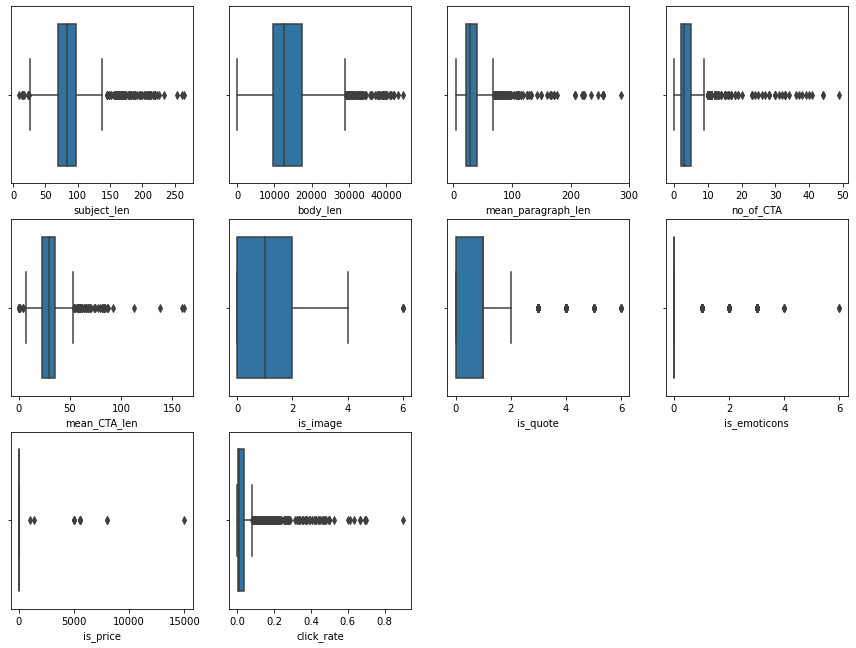

In [260]:
j =1
plt.figure(figsize=(15,15))
for i in df_num.columns:
    plt.subplot(4,4,j)
    sns.boxplot(df[i])
    j = j+1

 we can see that there are more outliers in the dataset, hence we are treating them with transformation

<AxesSubplot:>

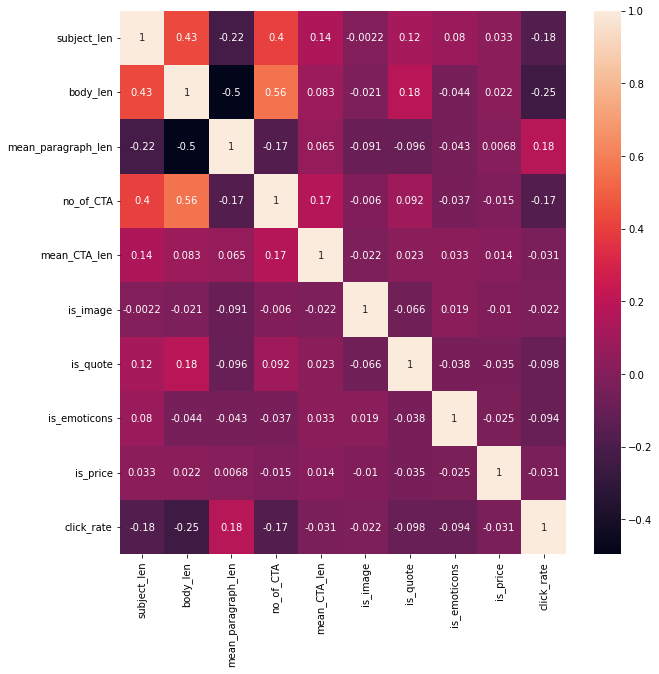

In [261]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

since there is no correlation greater than 0.6 we are taking that there is no multicollinearity

In [262]:
df.drop(["campaign_id"],inplace = True,axis =1)

we are dropping the campaign id as it is a unique column

In [263]:
xtest.set_index(["campaign_id"],inplace = True)

we are setting campaign id as index as we need them in the final submission sample

In [264]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)
xtest_num = xtest.select_dtypes(np.number)
xtest_cat = xtest.select_dtypes(object)

we are seperating numerical and categorical columns to do encoding then join them

In [265]:
df_encoded = pd.get_dummies(df_cat,drop_first=True)
xtest_encoded = pd.get_dummies(xtest_cat,drop_first=True)

In [266]:
xtest_encoded.head()

,is_weekend_1,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,is_personalised_1,is_discount_1,is_urgency_1
campaign_id,,,,,,,,,,,,,,,,,,,
1889,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1890,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1891,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1892,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [267]:
df_encoded.head()

,is_weekend_1,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,is_personalised_1,is_discount_1,is_urgency_1
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [268]:
df_full = pd.concat([df_num,df_encoded],axis =1)
df_full.head()

,subject_len,body_len,mean_paragraph_len,no_of_CTA,mean_CTA_len,is_image,is_quote,is_emoticons,is_price,click_rate,is_weekend_1,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,is_personalised_1,is_discount_1,is_urgency_1
0,76,10439,39,3,29,0,0,0,0,0.103079,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,54,2570,256,0,22,0,0,0,0,0.700000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,59,12801,16,3,23,1,1,0,0,0.002769,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,74,11037,30,4,24,0,0,0,0,0.010868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,80,10011,27,3,31,0,1,0,0,0.142826,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [269]:
xtest_full = pd.concat([xtest_num,xtest_encoded],axis =1)

we are encoding the numerical and encoded columns and making the final dataframe

In [270]:
xtest_full.head()

,subject_len,body_len,mean_paragraph_len,no_of_CTA,mean_CTA_len,is_image,is_quote,is_emoticons,is_price,is_weekend_1,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,is_personalised_1,is_discount_1,is_urgency_1
campaign_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1889,61,12871,11,3,37,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1890,54,2569,256,0,22,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1891,88,1473,78,0,22,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1892,88,1473,78,0,22,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893,78,9020,29,2,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [271]:
xtest_full.drop(["category_3"],axis =1,inplace=True)
xtest_full.drop(["category_14"],axis =1,inplace=True)

In [272]:
df_full.drop(["category_3"],axis =1,inplace=True)
df_full.drop(["category_14"],axis =1,inplace=True)

It looks like they both have insignificance hence dropping them

# Train test split

we are making train test split to test our model

In [273]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

In [274]:
x = df_full.drop(["click_rate"],axis =1)
y = df_full["click_rate"]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1321, 26)
y_train (1321,)
X_test (567, 26)
y_test (567,)


# Models

I have given XGBoost down, which was the model that gave me the highest score

In [275]:
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor

In [276]:
xgb = XGBRegressor()
xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [277]:
y_pred = xgb.predict(xtest_full)

I compared my submissions with my best score and tried to improve my score

In [278]:
ynew = pd.read_csv("Top_score.csv")
ynew1 = pd.read_csv("XGBSUDH1-columns.csv")
y_new = ynew["click_rate"]
y_new1 = ynew1["click_rate"]

In [279]:
r2_score(y_pred,y_new)

0.9918024513034397

In [280]:
np.corrcoef(y_pred,y_new)

array([[1.        , 0.99598703],
       [0.99598703, 1.        ]])

train 0.8979591836734694 0.0 0.04188756512145533
bestscore 0.68394595 -0.03403822 0.04213175210995145
nowpredscore 0.688579 -0.035241596 0.04290723
secondscore 0.6667544 -0.047386456 0.023652399961272965


<AxesSubplot:xlabel='click_rate', ylabel='Density'>

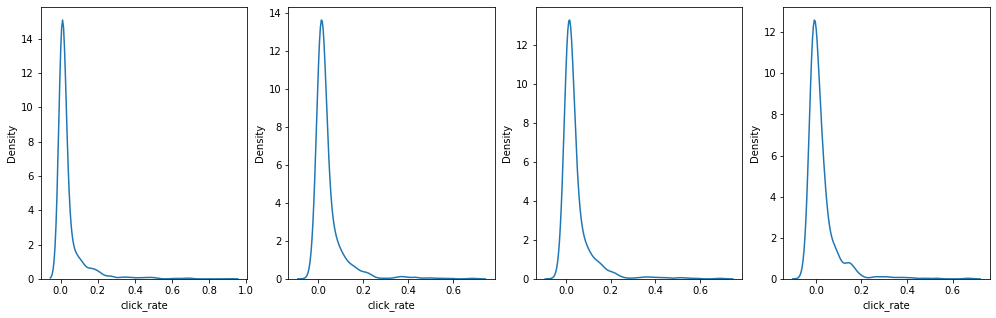

In [281]:
plt.figure(figsize=(17,5))
plt.subplot(1,4,1)
print("train", y.max(),y.min(),y.mean())
sns.kdeplot(y)
plt.subplot(1,4,2)
print("bestscore", y_new.max(),y_new.min(),y_new.mean())
sns.kdeplot(y_new)
plt.subplot(1,4,3)
print("nowpredscore", y_pred.max(),y_pred.min(),y_pred.mean())
sns.kdeplot(y_pred)
plt.subplot(1,4,4)
print("secondscore", y_new1.max(),y_new1.min(),y_new1.mean())
sns.kdeplot(y_new1)

xtest_full["click_rate"] = y_pred
xtest_full[["click_rate"]].to_csv("XGBday2-PCA.csv")

In [282]:
xtest_full["click_rate"]= y_pred
xtest_full[["click_rate"]].to_csv("Day3-XGboost26.csv")

I am saving my predicted values using the above code and 

In [629]:
xtest["click_rate"]= y_new

In [630]:
xtest_full.drop(["click_rate"],axis =1,inplace = True)